
# 10 Ordinary Differential Equations (ODEs)

[ODE](http://mathworld.wolfram.com/OrdinaryDifferentialEquation.html)s describe many phenomena in physics. They describe the changes of a **dependent variable** $y(t)$ as a function of a **single independent variable** (e.g. $t$ or $x$).

An ODE of **order** $n$

$$
F(t, y^{(0)}, y^{(1)}, ..., y^{(n)}) = 0
$$

contains derivatives $y^{(k)}(t) \equiv y^{(k)} \equiv \frac{d^{k}y(t)}{dt^{k}}$ up to the $n$-th derivative (and $y^{(0)} \equiv y$). 


### Initial and boundary conditions

* $n$ **initial conditions** are needed to *uniquely determine* the solution of a $n$-th order ODE, e.g, initial position and velocities. 

* **Boundary conditions** (values of solution on domain boundries) can additionaly restrict solutions but the resulting *eigenvalue problems* are more difficult, e.g, wavefunction goes towards 0 for $\pm\infty$.

### Linear ODEs
A **linear** ODE contains no higher powers than 1 of any of the $y^{(k)}$. 

*Superposition principle*: Linear combinations of solutions are also solutions.

#### Example: First order linear ODE

\begin{align}
\frac{dy}{dt} &= f(t)y + g(t)\\
y^{(1)} &= f(t)y + g(t)\\
% y^{(1)} - f(t)y - g(t) &= 0
\end{align}

##### Radioactive decay
$$
\frac{dN}{dt} = -k N
$$


### Non-linear ODEs
**Non-linear** ODEs can contain any powers in the dependent variable and its derivatives.

No superposition of solutions. Often impossible to solve analytically.

#### Example: Second order (general) ODE
\begin{gather}
\frac{d^2 y}{dt^2} + \lambda(t) \frac{dy}{dt} = f\left(t, y, \frac{dy}{dt}\right)\\
\end{gather}

##### Newton's equations of motion
$$
m\frac{d^2 x}{dt^2} = F(x) + F_\text{ext}(x, t) \quad \text{with} 
\quad F(x) = -\frac{dU}{dx}
$$
(Force is often derived from a potential energy $U(x)$ and may contain non-linear terms such as $x^{-2}$ or $x^3$.)

## Partial differential equations (PDEs)
* more than one independent variable (e.g. $x$ and $t$)
* partial derivatives
* much more difficult than ODEs

#### Example: Schrödinger equation (Quantum Mechanics)
$$
i\hbar \frac{\partial\psi(\mathbf{x}, t)}{\partial t} = -\frac{\hbar^2}{2m} 
   \left(\frac{\partial^2 \psi}{\partial x^2} +  
         \frac{\partial^2 \psi}{\partial y^2} + 
         \frac{\partial^2 \psi}{\partial z^2}
   \right) + V(\mathbf{x})\, \psi(\mathbf{x}, t)
$$

## Harmonic and anharmonic oscillator
* particle with mass $m$ connected to a spring
* spring described by a harmonic potential or anharmonic ones in the displacements from equilibrium $x$

\begin{align}
U_1(x) &= \frac{1}{2} k x^2, \quad k=1\\
U_2(x) &= \frac{1}{2} k x^2 \left(1 - \frac{2}{3}\alpha x\right), \quad k=1,\ \alpha=\frac{1}{2}\\
U_3(x) &= \frac{1}{p} k x^p, \quad k=1,\ p=6
\end{align}

1. What do these potentials look like? Sketch or plot.
2. Calculate the forces.

#### Potentials 

In [1]:
import numpy as np

def U1(x, k=1):
    return 0.5 * k * x*x

def U2(x, k=1, alpha=0.5):
    return 0.5 * k * x*x * (1 - (2/3)*alpha*x)

def U3(x, k=1, p=6):
    return (k/p) * np.power(x, p)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-talk')
%matplotlib inline

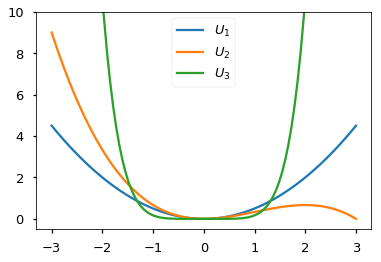

In [3]:
X = np.linspace(-3, 3, 100)
ax = plt.subplot(1,1,1)
ax.plot(X, U1(X), label=r"$U_1$")
ax.plot(X, U2(X), label=r"$U_2$")
ax.plot(X, U3(X), label=r"$U_3$")
ax.set_ylim(-0.5, 10)
ax.legend(loc="upper center");

#### Forces 

\begin{align}
F_1(x) &= -kx\\
F_2(x) &= -kx(1 + \alpha x)\\
F_3(x) &= -k x^{p-1}
\end{align}

## ODE Algorithms
Basic idea:

1. Start with initial conditions, $y_0 \equiv y(t=0)$
2. Use $\frac{dy}{dt} = f(t, y)$ (the RHS!) to advance solution a small step $h$ forward in time: $y(t=h) \equiv y_1$
3. Repeat with $y_1$ to obtain $y_2 \equiv y(t=2h)$... and for all future values of $t$.

Possible issues
* small differences: subtractive cancelation and round-off error accumulation
* extrapolation: numerical "solution" can deviate wildly from exact
* possibly need adaptive $h$

### Euler's rule
Simple: forward difference

\begin{align}
f(t, y) = \frac{dy(t)}{dt} &\approx \frac{y(t_{n+1}) - y(t_n)}{h}\\
y_{n+1} &\approx y_n + h f(t_n, y_n) \quad \text{with} \quad y_n := y(t_n)
\end{align}

Error will be $\mathcal{O}(h^2)$ (bad!).

Also: what if we have a second order ODE ?!?! We only used $dy/dt$.

### Convert 2nd order ODE to 2 coupled _First Order_ ODEs

![First Order](https://vignette.wikia.nocookie.net/starwars/images/4/46/First_Order.svg/revision/latest?cb=20150906223805)

### Convert 2nd order ODE to 2 coupled 1st order ODEs
The 2nd order ODE is
$$
\frac{d^2 y}{dt^2} = f(t, y)
$$

Introduce "dummy" dependent variables $y_i$ with $y_0 \equiv y$ and

\begin{alignat}{1}
\frac{dy}{dt} &= \frac{dy_0}{dt} &=   y_1\\
\frac{d^2y}{dt^2} &= \frac{dy_1}{dt} &= {} f(t, y_0).
\end{alignat}


The first equation defines the velocity $y_1 = v$ and the second one is the original ODE.

### $n$-th oder ODE to $n$ coupled 1st order ODEs 

The $n$-th order ODE is
$$
\frac{d^n y}{dt^n} = f(t, y, \frac{d y}{dt}, \frac{d^2 y}{dt^2}, \dots, \frac{d^{n-1} y}{dt^{n-1}})
$$

Introduce "dummy" dependent variables $y^{(i)}$ with $y^{(0)} \equiv y$ and

\begin{align}
\frac{dy^{(0)}}{dt} &=  y^{(1)}\\
\frac{dy^{(1)}}{dt} &=  y^{(2)}\\
\dots & \\
\frac{dy^{(n-1)}}{dt} &=  f(t, y^{(0)}, y^{(1)}, y^{(2)}, \dots, y^{(n-1)}).
\end{align}

### General standard (dynamic) form of ODEs
1 ODE of *any order* $n$ $\rightarrow$ $n$ coupled simultaneous first-order ODEs in $n$ unknowns  $y^{(0)}, \dots, y^{(n-1)}$:

\begin{align}
\frac{dy^{(0)}}{dt} &= f^{(0)}(t, y^{(0)}, \dots, y^{(n-1)})\\
\frac{dy^{(1)}}{dt} &= f^{(1)}(t, y^{(0)}, \dots, y^{(n-1)})\\
\vdots &  \\
\frac{dy^{(n-1)}}{dt} &= f^{(n-1)}(t, y^{(0)}, \dots, y^{(n-1)})\\
\end{align}

In $n$-dimensional vector notation:

\begin{align}
\frac{d\mathbf{y}(t)}{dt} &= \mathbf{f}(t, \mathbf{y})\\
\mathbf{y} &= \left(\begin{array}{c}
  y^{(0)}(t) \\
  y^{(1)}(t) \\
  \vdots \\
  y^{(n-1)}(t)
  \end{array}\right),
\quad
\mathbf{f} = \left(\begin{array}{c}
  f^{(0)}(t, \mathbf{y}) \\
  f^{(1)}(t, \mathbf{y}) \\
  \vdots \\
  f^{(n-1)}(t, \mathbf{y})
  \end{array}\right)
\end{align}

#### Example: Convert Newton's EOMs to standard form

$$
\frac{d^2 x}{dt^2} = m^{-1} F\Big(t, x, \frac{dx}{dt}\Big)
$$

RHS may *not contain any explicit derivatives* but components of $\mathbf{y}$ can represent derivatives.
* position $x$ as first dependent variable $y^{(0)}$ (as usual).
* velocity $dx/dt$ as second dependent variable $y^{(1)}$

\begin{align}
y^{(0)}(t) &:= x(t)\\
y^{(1)}(t) &:= \frac{dx}{dt} = \frac{dy^{(0)}}{dt}
\end{align}

One 2nd order ODE 

$$
\frac{d^2 x}{dt^2} = m^{-1} F\Big(t, x, \frac{dx}{dt}\Big)
$$

to two simultaneous 1st order ODEs:

\begin{align}
\frac{dy^{(0)}}{dt} &= y^{(1)}(t)\\
\frac{dy^{(1)}}{dt} &= m^{-1} F\Big(t, y^{(0)}, y^{(1)}\Big)
\end{align}


\begin{align}
\frac{d\mathbf{y}(t)}{dt} &= \mathbf{f}(t, \mathbf{y})\\
\mathbf{y} &= \left(\begin{array}{c}
     y^{(0)} \\
     y^{(1)}
  \end{array}\right) =
  \left(\begin{array}{c}
     x(t) \\
     \frac{dx}{dt}
  \end{array}\right),\\
\mathbf{f} &= \left(\begin{array}{c}
    y^{(1)}(t) \\
    m^{-1} F\Big(t, y^{(0)}, y^{(1)}\Big)
  \end{array}\right) = 
  \left(\begin{array}{c}
    \frac{dx}{dt} \\
    m^{-1} F\Big(t, x(t), \frac{dx}{dt}\Big)
  \end{array}\right)
\end{align}

#### Example:  1D harmonic oscillator in standard form
With $F_1 = -k x$:
$$
\frac{d^2 x}{dt^2} = -m^{-1}k x
$$
convert to

\begin{align}
\frac{dy^{(0)}}{dt} &= y^{(1)}(t) \\
\frac{dy^{(1)}}{dt} &= -m^{-1}k y^{(0)}
\end{align}

Force (or derivative) function $\mathbf{f}$ and initial conditions:

\begin{alignat}{3}
f^{(0)}(t, \mathbf{y}) &= y^{(1)},
    &\quad y^{(0)}(0) &= x_0,\\
f^{(1)}(t, \mathbf{y}) &=  -m^{-1} k y^{(0)},
    &\quad y^{(1)}(0) &= v_0.
\end{alignat}

### Euler's rule (standard form)
Given the $n$-dimensional vectors from the ODE standard form

$$
\frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y})
$$
the **Euler rule** amounts to

\begin{align}
\mathbf{f}(t, \mathbf{y}) = \frac{d\mathbf{y}(t)}{dt} &\approx \frac{\mathbf{y}(t_{n+1}) - \mathbf{y}(t_n)}{\Delta t}\\
\mathbf{y}_{n+1} &\approx \mathbf{y}_n + \Delta t \mathbf{f}(t_n, \mathbf{y}_n) \quad \text{with} \quad \mathbf{y}_n := \mathbf{y}(t_n)
\end{align}

## Problem: Numerically integrate the 1D harmonic oscillator with Euler

\begin{alignat}{3}
f^{(0)}(t, \mathbf{y}) &= y^{(1)},
    &\quad y^{(0)}(0) &= x_0,\\
f^{(1)}(t, \mathbf{y}) &=   - \frac{k}{m} y^{(0)},
    &\quad y^{(1)}(0) &= v_0.
\end{alignat}

with $k=1$; $x_0 = 0$ and $v_0 = +1$.

### Explicit implementation:
* Note how in `f_harmonic` we are constructing the force vector of the standard ODE representation
* `y` is the vector of dependents in the standard representation
* We pre-allocate the array for `y` and then assign to individual elements with the
  ```python
  y[:] = ...
  ```
  notation, which has higher performance than creating the array anew every time.
 

In [4]:
import numpy as np

def F1(x, k=1):
    """Harmonic force"""
    return -k*x

def f_harmonic(t, y, k=1, m=1):
    """Force vector in standard ODE form (n=2)"""
    return np.array([y[1], F1(y[0], k=k)/m])

t_max = 100
h = 0.01
Nsteps = t_max/h
t_range = h * np.arange(Nsteps)
x = np.empty_like(t_range)

y = np.zeros(2)

# initial conditions
x0, v0 = 0.0, 1.0
y[:] = x0, v0

for i, t in enumerate(t_range):
    # store position that corresponds to time t_i
    x[i] = y[0]
    # Euler integrator
    y[:] = y + h * f_harmonic(t, y)

Plot the position $x(t)$ (which is $y_0$) against time:

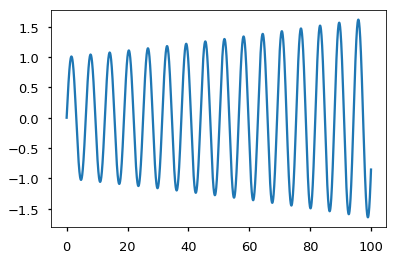

In [5]:
plt.plot(t_range, x)

### Modular solution with functions
We can make the Euler integrator a function, which makes the code more readable and modular and we can make the whole integration a function, too. This will allow us to easily run the integration with different initial values or `h` steps.

In [6]:
import numpy as np

def F1(x, k=1):
    """Harmonic force"""
    return -k*x

def f_harmonic(t, y, k=1, m=1):
    """Force vector in standard ODE form (n=2)"""
    return np.array([y[1], F1(y[0], k=k)/m])

def euler(y, f, t, h):
    """Euler integrator.
    
    Returns new y at t+h.
    """
    return y + h * f(t, y)

def integrate(x0=0, v0=1, t_max=100, h=0.001):
    """Integrate the harmonic oscillator with force F1.
    
    Note that the spring constant k and particle mass m are currently
    pre-defined.
    
    Arguments
    ---------
    x0 : float
       initial position
    v0 : float
       initial velocity
    t_max : float
       time to integrate out to
    h : float, default 0.001
       integration time step
       
    Returns
    -------
    Tuple ``(t, x)`` with times and positions.
    """
    
    Nsteps = t_max/h
    t_range = h * np.arange(Nsteps)
    x = np.empty_like(t_range)
    y = np.zeros(2)
    # initial conditions
    y[:] = x0, v0

    for i, t in enumerate(t_range):
        # store position that corresponds to time t_i
        x[i] = y[0]
        # Euler integrator
        y[:] = euler(y, f_harmonic, t, h)
        
    return t_range, x

Plot the position as a function of time, $x(t)$.

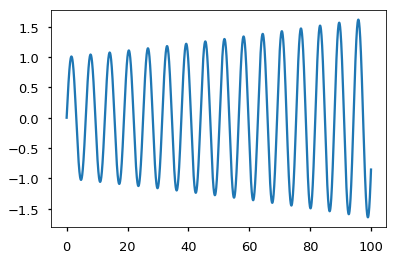

In [13]:
t, x = integrate(h=0.01)
plt.plot(t, x)

Analytical solution:
$$
\omega = \sqrt{\frac{k}{m}}
$$
and
$$
x(t) = A \sin(\omega t)
$$
here with $A=1$ and $\omega = 1$:

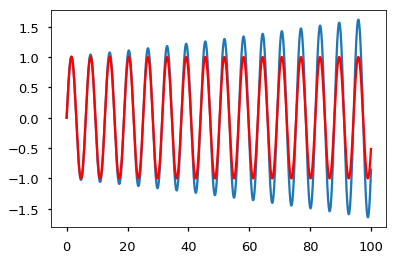

In [14]:
plt.plot(t, x)
plt.plot(t, np.sin(t), color="red")

Note the increase in amplitude. Explore if smaller $h$ fixes this obvious problem.

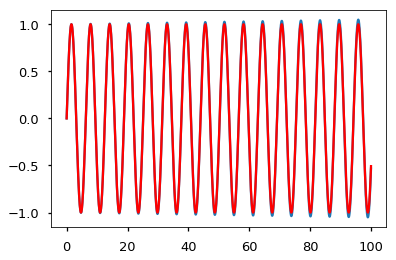

In [15]:
t, x = integrate(h=0.001)
plt.plot(t, x)
plt.plot(t, np.sin(t), color="red")

Smaller $h$ improves the integration (but Euler is still a bad algorithm... just run out for longer, i.e., higher `t_max`.)

### Note on Euler's global error

How does the global error after time $t$ behave, i.e., what is its dependency on step size $h$?

* Per-step (**local**) error is $\mathcal{O}(h^2)$.
* For time $t = N h$ we have $N \propto 1/h$ steps.

We assume that we linearly accumulate local error for the **global error** for $N$ steps: 

$$
\mathcal{O}(h^2) \times h^{-1} \propto \mathcal{O}(h) 
$$

Thus, halving $h$ should halve the global error.